<a href="https://colab.research.google.com/github/hsallrounder/Cognitive-Analytics-Lab/blob/main/Phishing_Detection_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
urlData = pd.read_csv('/content/drive/MyDrive/Datasets/urldata.csv')
urlData.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [ ]:
urlData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

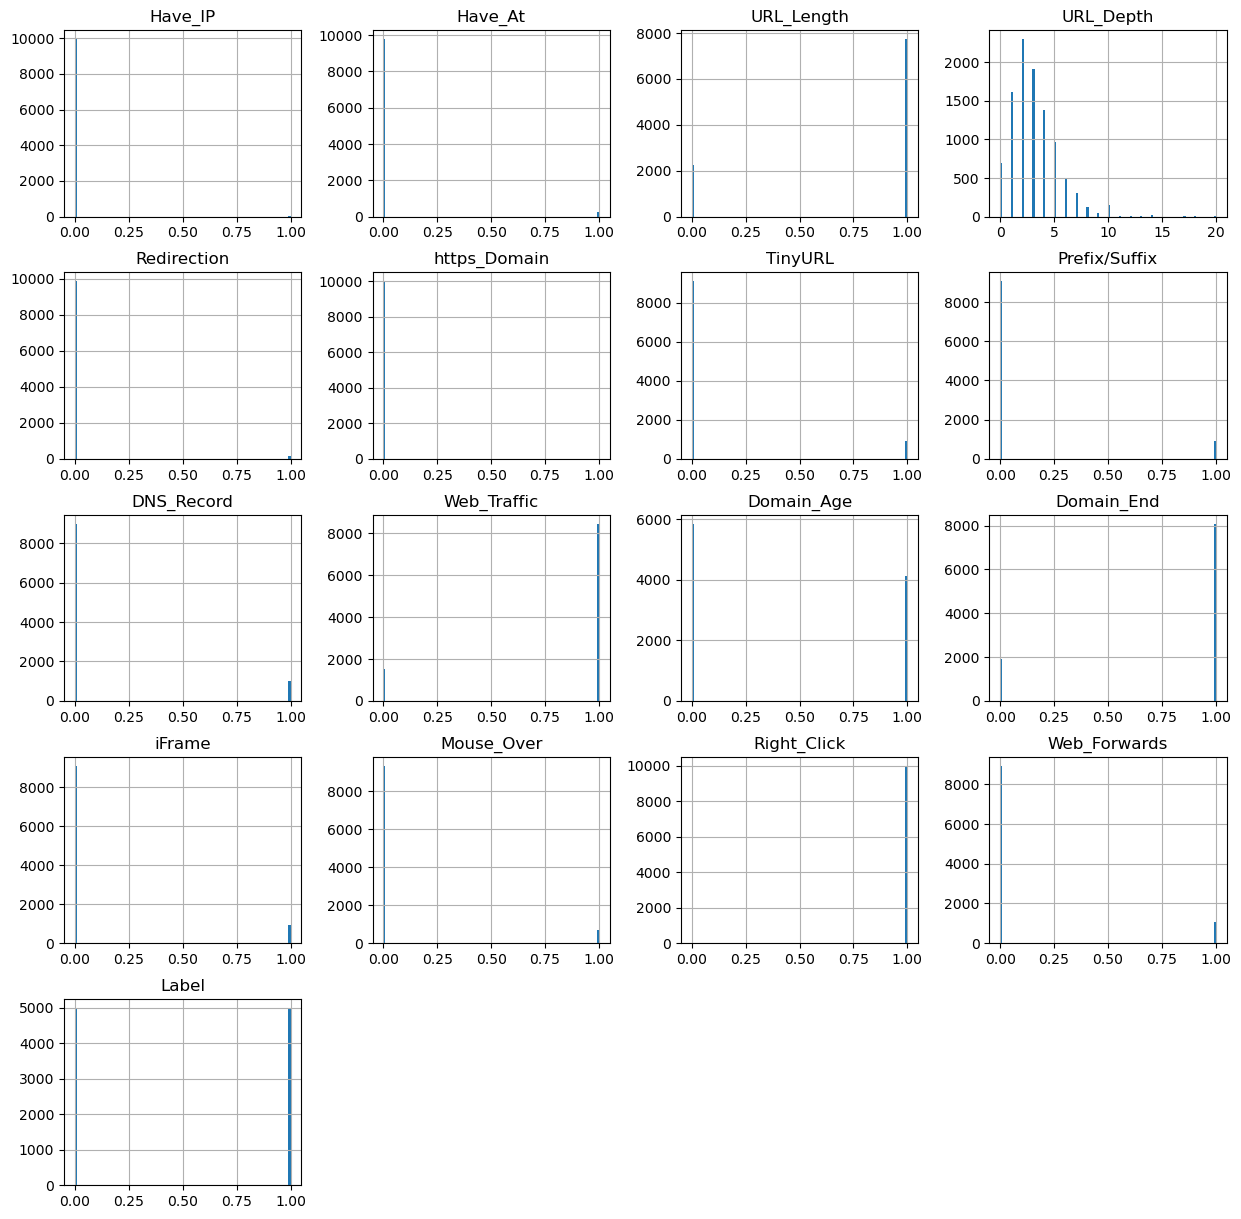

In [ ]:
# Data Distribution Plot
urlData.hist(bins = 100,figsize = (15,15))
plt.show()

C:\Users\kshit\AppData\Local\Temp\ipykernel_21480\2066501825.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(urlData.corr())


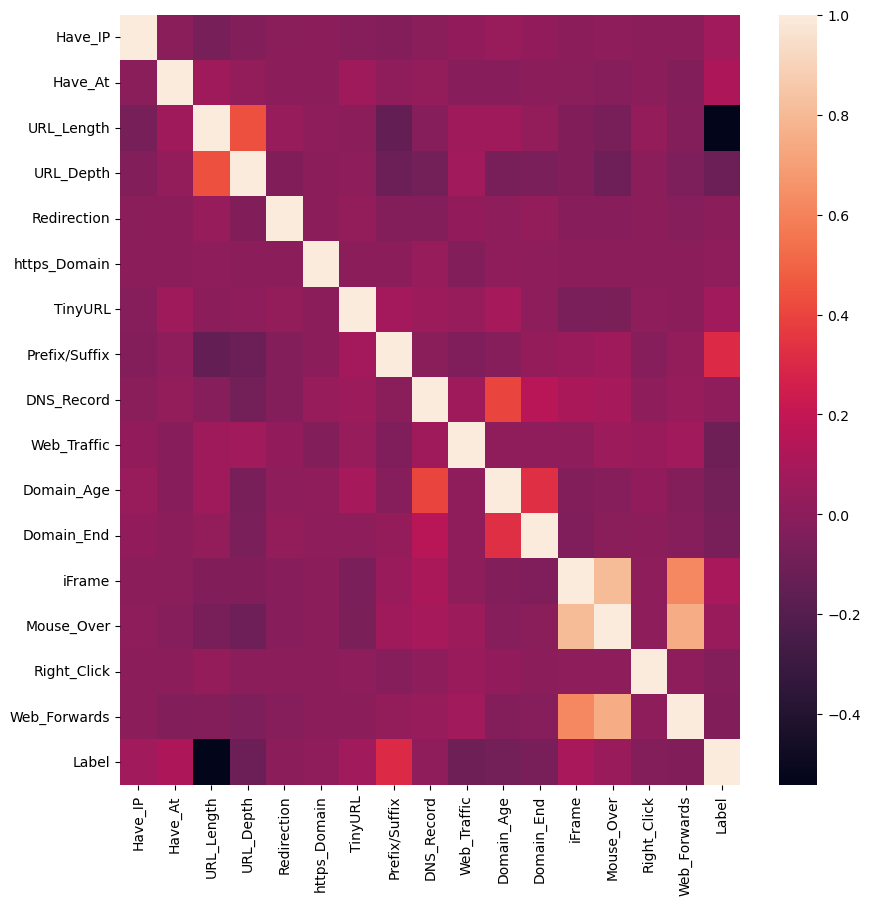

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(urlData.corr())
plt.show()

In [ ]:
urlData.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


In [ ]:
urlData = urlData.drop(['Domain'], axis = 1).copy()

In [ ]:
urlData.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [ ]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
urlData = urlData.sample(frac=1).reset_index(drop=True)
urlData.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,4,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,1,1,1
2,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1
3,0,0,1,5,0,0,0,0,0,1,0,0,0,0,1,0,1
4,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


## Splitting the Data

In [ ]:
y = urlData['Label']
x = urlData.drop('Label',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=15)

# Training and Testing

* This is a classification problem, where the label _1_ signifies _"PHISHING"_ and label _0_ signifies _"LEGITIMATE"_ website
* MODELS TO BE USED:
    * Decision Tree
    * Random Forest
    * Support Vector Machines

In [ ]:
from sklearn.metrics import accuracy_score

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_decisionTree = DecisionTreeClassifier(max_depth=4)
clf_decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
tree_predict_train = clf_decisionTree.predict(x_train)
tree_predict_test = clf_decisionTree.predict(x_test)

accuracy_train_tree = accuracy_score(y_train,tree_predict_train)
accuracy_test_tree = accuracy_score(y_test,tree_predict_test)

print("Accuracy on training Data: ", accuracy_train_tree)
print("Accuracy on test Data: ", accuracy_test_tree)

Accuracy on training Data:  0.7945333333333333
Accuracy on test Data:  0.8116


# !pip install graphviz
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf_decisionTree, out_file=None,
                                feature_names=x.columns,  
                                class_names={1:'phishing',0:'legit'},
                                filled=True)

graph = graphviz.Source(dot_data, format="png")
graph

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_randomForest = RandomForestClassifier(max_depth=4)
clf_randomForest.fit(x_train, y_train)

RandomForestClassifier(max_depth=4)

In [ ]:
randomForest_predict_test = clf_randomForest.predict(x_test)
randomForest_predict_train = clf_randomForest.predict(x_train)

accuracy_train_forest = accuracy_score(y_train,randomForest_predict_train)
accuracy_test_forest = accuracy_score(y_test,randomForest_predict_test)

print("Accuracy on training Data: ", accuracy_train_forest)
print("Accuracy on test Data: ", accuracy_test_forest)

Accuracy on training Data:  0.8058666666666666
Accuracy on test Data:  0.8264


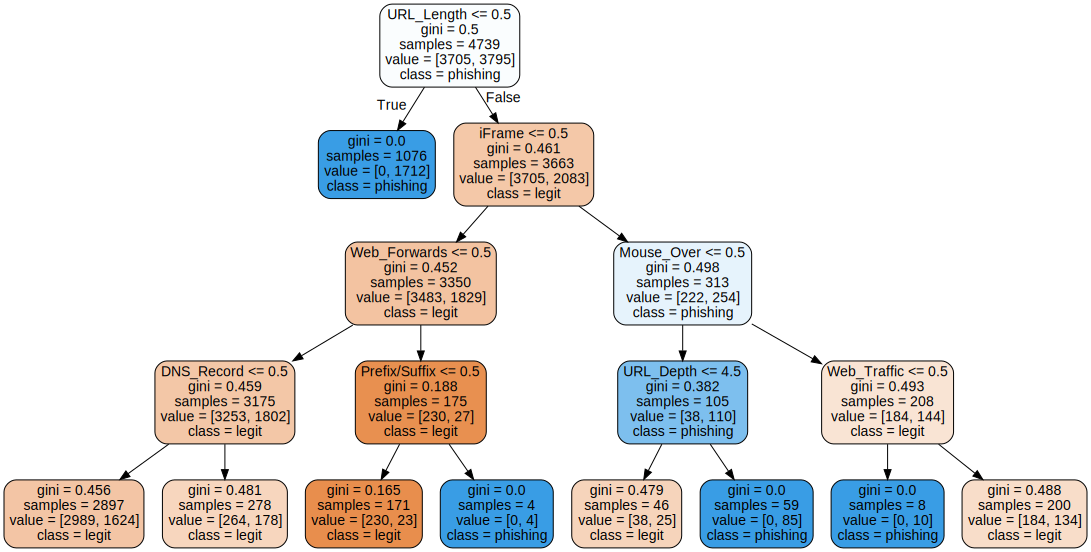

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf_randomForest.estimators_[99],
                           feature_names=x.columns,
                           class_names={1:'phishing',0:'legit'},
                           filled=True, impurity=True,
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph

## Support Vector Machines

In [ ]:
#Support vector machine model
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=12)
svm.fit(x_train, y_train)

SVC(kernel='linear', random_state=12)

In [ ]:
svm_predict_test = svm.predict(x_test)
svm_predict_train = svm.predict(x_train)

accuracy_train_svm = accuracy_score(y_train,svm_predict_train)
accuracy_test_svm = accuracy_score(y_test,svm_predict_test)

print("Accuracy on training Data: ", accuracy_train_svm)
print("Accuracy on test Data: ", accuracy_test_svm)

Accuracy on training Data:  0.7966666666666666
Accuracy on test Data:  0.8184


# Model Selection

In [ ]:
models = ["Decision Tree Classifier", "Random Forest Classifier", "Support Vector "]
score = [accuracy_test_tree, accuracy_test_forest, accuracy_test_svm]
classifierName = ['clf_decisionTree','clf_randomForest','svm']
final = pd.DataFrame({ 'ML Model': models, 'Classifier Name': classifierName, 'Test Accuracy': score})
final

,ML Model,Classifier Name,Test Accuracy
0,Decision Tree Classifier,clf_decisionTree,0.8116
1,Random Forest Classifier,clf_randomForest,0.8264
2,Support Vector,svm,0.8184


### Saving the model using pickle dump

In [ ]:
final_df = final.sort_values(by=['Test Accuracy'], ascending=False).reset_index(drop=True)

In [ ]:
final_df

,ML Model,Classifier Name,Test Accuracy
0,Random Forest Classifier,clf_randomForest,0.8264
1,Support Vector,svm,0.8184
2,Decision Tree Classifier,clf_decisionTree,0.8116


In [ ]:
import pickle
pickle.dump(final_df['Classifier Name'][0], open("./DataFiles/Phishing_Detection_Model.pickle.dat", "wb"))

In [ ]:
loaded_model = pickle.load(open("./DataFiles/Phishing_Detection_Model.pickle.dat", "rb"))
loaded_model

'clf_randomForest'

In [ ]:
final_df['Classifier Name'][0]

'clf_randomForest'